<a href="https://colab.research.google.com/github/ChintaLokesh/Deep_Learning_Neural_Network/blob/master/NN_Program_version_cats_vs_dogs_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.backend import categorical_crossentropy
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import shutil as sh


from google.colab import files 

files.upload()

! mkdir - p ~/.kaggle
! cp kaggle.json ~/.kaggle

!kaggle competitions download -c dogs-vs-cats
! unzip /content/dogs-vs-cats.zip
! unzip train.zip 

os.mkdir("master_data")
os.mkdir("master_data/cat")
os.mkdir("master_data/dog")


source = "train/"
dest_dog="master_data/dog/"
dest_cat="master_data/cat/"

for filename in os.listdir("train"):
  if "cat" in filename:
    sh.copy(source+filename,dest_cat)
  else:
    sh.copy(source+filename,dest_dog)

batchsize=128

# idg = tf.keras.preprocessing.image.ImageDataGenerator(
#     validation_split=0.1,
#     rescale=1/255.0
# )

# train_spt = idg.flow_from_directory(
#     target_size=(150,150),
#     directory="master_data",
#     batch_size=batchsize,
#     subset="training"
# )

# val_spt = idg.flow_from_directory(
#     directory="master_data",
#     target_size=(150,150),
#     subset="validation",
#     batch_size=batchsize
# )

idg = tf.keras.preprocessing.image.ImageDataGenerator(validation_split= 0.1, rescale=1/255.0)

# Resizing the images to (150, 150)
train_idg = idg.flow_from_directory(directory = "master_data", target_size = (150, 150), batch_size=batchsize, subset="training")



val_idg = idg.flow_from_directory(directory = "master_data", target_size=(150, 150), batch_size=batchsize, subset="validation")


model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((150,150,3),name="Input"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation=tf.keras.activations.relu ,name="hidden_layer"))
model.add(tf.keras.layers.Dense(2,activation=tf.keras.activations.softmax ,name="output"))

model.compile(
     optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["acc"]
)



# model.fit(train_spt,
#           batch_size=batchsize,
#           validation_data=val_spt,
#           epochs=8)


model.fit(train_idg, batch_size=batchsize, 
          epochs=10, 
          validation_data=val_idg)




Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      
  inflating: train/dog.5521.jpg      
  inflating: train/dog.5522.jpg      
  inflating: train/dog.5523.jpg      
  inflating: train/dog.5524.jpg      
  inflating: train/dog.5525.jpg      
  inflating: train/dog.5526.jpg      
  inflating: train/dog.5527.jpg      
  inflating: train/dog.5528.jpg      
  inflating: train/dog.5529.jpg      
  inflating: train/dog.553.jpg       
  inflating: train/dog.5530.jpg      
  inflating: train/dog.5531.jpg      
  inflating: train/dog.5532.jpg      
  inflating: train/dog.5533.jpg      
  inflating: train/dog.5534.jpg      
  inflating: train/dog.5535.jpg      
  inflating: train/dog.5536.jpg      
  inflating: train/dog.5537.jpg      
  inflating: train/dog.5538.jpg      
  inflating: train/dog.5539.jpg      
  inflating: train/dog.554.jpg       
  inflating: train/dog.5540.jpg      

In [25]:
model.save("Dogs_cats_model_output")

In [5]:
import cv2
import numpy as np

In [22]:
def predict (im):
  image=cv2.imread(im)
  plt.imshow(image)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image=cv2.resize(image,(150,150))
  image = image / 255.0
  image=np.expand_dims(image,axis=0)
  result = model.predict(image)
  print(f"model predicted {np.argmax(result.max())} with confidence {np.round(result.max()*100,2)} %")




In [24]:
! unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

1/1 [==============================] - 0s 41ms/step
model predicted 0 with confidence 82.16 %


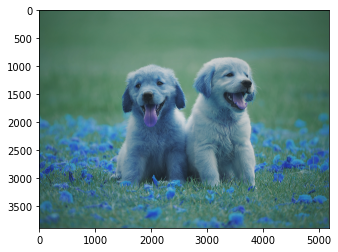

In [23]:
predict ("/content/123.jpeg")